In [1]:
import numpy as np
import Acceleration as Ace
import scvelo as scv
import MyCodePloting as mc
import MyCodeTools as mt
scv.logging.print_version()

Running scvelo 0.2.5 (python 3.10.2) on 2023-08-07 13:25.


In [2]:
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization

In [3]:
adata = scv.datasets.pancreas()
adata

AnnData object with n_obs × n_vars = 3696 × 27998
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score'
    var: 'highly_variable_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'
    obsp: 'distances', 'connectivities'

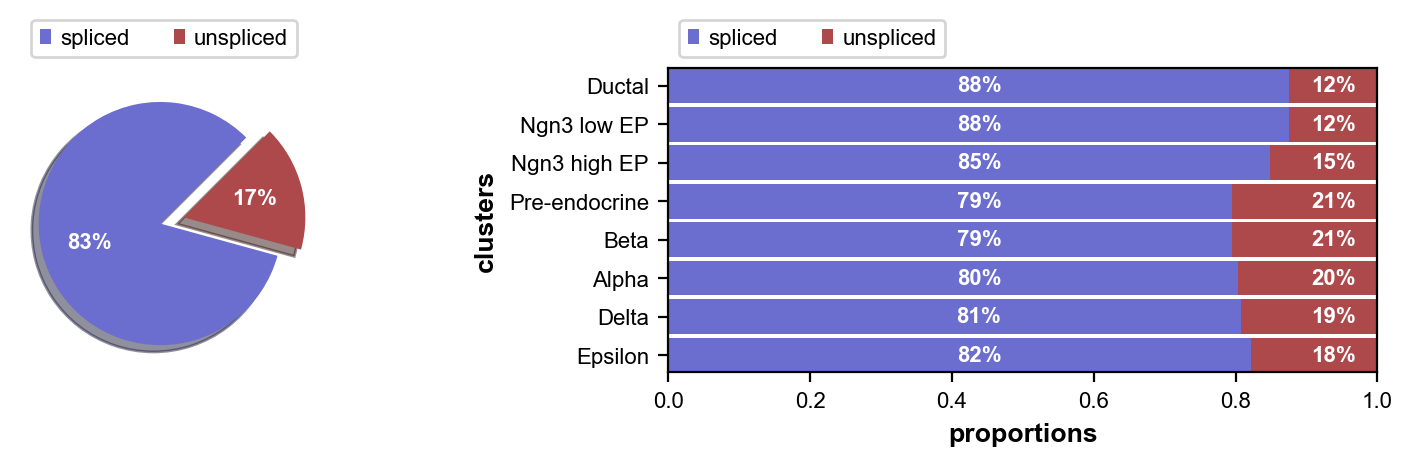

In [4]:
scv.pl.proportions(adata)

In [5]:
scv.pp.filter_genes(adata, min_shared_counts=20)
scv.pp.normalize_per_cell(adata)
scv.pp.filter_genes_dispersion(adata, n_top_genes=2000)
scv.pp.log1p(adata)

Filtered out 20801 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.


In [6]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

Filtered out 55 genes that are detected 20 counts (shared).
Skip filtering by dispersion since number of variables are less than `n_top_genes`.
computing neighbors
    finished (0:01:22) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [7]:
Spliced = adata.to_df(layer='Ms')
Unspliced = adata.to_df(layer='Mu')

In [8]:
scv.tl.velocity(adata)
gamma = adata.var['velocity_gamma']
acc = Unspliced - (1+gamma)*Unspliced + (gamma**2)*Spliced   # Mu - (1+gamma)*Mu + (gamma**2)*Ms
acc

computing velocities
    finished (0:00:02) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


index                Sntg1     Snhg6     Ncoa2    Sbspon     Ube2w      Mcm3  \
index                                                                          
AAACCTGAGAGGGATA -1.134316  0.002125 -2.738130  0.000000 -0.380003  0.000006   
AAACCTGAGCCTTGAT -1.451067  0.016313 -0.914090  0.017468 -0.585849 -0.000153   
AAACCTGAGGCAATTA -1.453442 -0.000553  0.027394  0.000000 -1.126213  0.000000   
AAACCTGCATCATCCC -4.916480  0.005523 -1.312977 -0.008214 -0.558143  0.000583   
AAACCTGGTAAGTGGC  0.000000  0.001477 -2.592697  0.001699 -0.436489  0.000084   
...                    ...       ...       ...       ...       ...       ...   
TTTGTCAAGTGACATA -1.976368  0.003512  0.849631 -0.004986 -0.964039  0.000035   
TTTGTCAAGTGTGGCA -4.772754  0.012574 -0.580785  0.000768  0.154908  0.000290   
TTTGTCAGTTGTTTGG -0.729895  0.016896 -1.267418 -0.013943 -0.088003  0.000170   
TTTGTCATCGAATGCT -4.099990  0.004873 -0.794175  0.000000 -0.396355 -0.000245   
TTTGTCATCTGTTTGT -1.610346  0.007670 -1.228157 -0.005214 -0.687867  0.000008   

index              Fam135a      Adgrb3   Tmem131    Tbc1d8  ...   Sh3kbp1  \
index                                                       ...             
AAACCTGAGAGGGATA  0.364272  -14.467838  0.109050 -0.042133  ... -0.154250   
AAACCTGAGCCTTGAT -0.202317    0.000000 -0.102683  0.075185  ... -0.064810   
AAACCTGAGGCAATTA  0.100168   23.356176 -0.197658 -0.325118  ... -0.146898   
AAACCTGCATCATCCC -0.202006    0.000000 -0.189386 -0.062061  ... -0.064239   
AAACCTGGTAAGTGGC -0.774977 -229.785446 -0.123539 -0.102249  ... -0.364692   
...                    ...         ...       ...       ...  ...       ...   
TTTGTCAAGTGACATA  0.182388   61.015625  0.062272 -0.095490  ... -0.276724   
TTTGTCAAGTGTGGCA -1.380654 -137.296753 -0.082838 -0.738939  ... -0.296209   
TTTGTCAGTTGTTTGG -0.677673    0.000000  0.004450  0.423949  ...  0.114256   
TTTGTCATCGAATGCT -0.452522  -23.866234  0.207498  0.006091  ... -0.209754   
TTTGTCATCTGTTTGT -0.110773   -4.717304 -0.083319  0.334354  ... -0.069915   

index              Map3k15      Rai2     Rbbp7     Ap1s2    Tmem27       Uty  \
index                                                                          
AAACCTGAGAGGGATA -0.037570  0.006066  0.003464  0.046979 -0.000043 -1.652970   
AAACCTGAGCCTTGAT  0.000000  0.000000  0.007590  0.000000 -0.000121 -1.916720   
AAACCTGAGGCAATTA -0.029169 -0.021721  0.010259 -0.033851 -0.000553 -0.153183   
AAACCTGCATCATCCC -0.027558  0.000000  0.000900  0.000000  0.000001 -0.234776   
AAACCTGGTAAGTGGC  0.043938  0.000000  0.006227  0.000000  0.000000  0.573897   
...                    ...       ...       ...       ...       ...       ...   
TTTGTCAAGTGACATA  0.007473 -0.002064  0.001387  0.017701 -0.000204 -0.906063   
TTTGTCAAGTGTGGCA -0.355961  0.001125  0.003675 -0.031600  0.000002  0.526619   
TTTGTCAGTTGTTTGG  0.000000  0.000000 -0.013295  0.000000  0.000002 -0.321104   
TTTGTCATCGAATGCT -0.010287 -0.006873  0.012732 -0.136350 -0.000938  0.314040   
TTTGTCATCTGTTTGT -0.055044  0.004463  0.013198  0.053822 -0.000090 -0.099449   

index                Ddx3y   Eif2s3y     Erdr1  
index                                           
AAACCTGAGAGGGATA -0.058437 -0.035518  0.247866  
AAACCTGAGCCTTGAT -0.039389 -0.016612 -0.154927  
AAACCTGAGGCAATTA -0.073865 -0.009291  0.173357  
AAACCTGCATCATCCC -0.150361 -0.016916  0.183700  
AAACCTGGTAAGTGGC -0.226311 -0.008755  0.644497  
...                    ...       ...       ...  
TTTGTCAAGTGACATA -0.029009 -0.025096  0.295939  
TTTGTCAAGTGTGGCA -0.001446  0.006321  0.097839  
TTTGTCAGTTGTTTGG  0.000508 -0.012621 -0.106569  
TTTGTCATCGAATGCT  0.118910 -0.035392  0.383040  
TTTGTCATCTGTTTGT -0.082209  0.007760  0.241771  

[3696 rows x 1945 columns]

In [9]:
adata.layers['acc'] = acc
adata

AnnData object with n_obs × n_vars = 3696 × 1945
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts'
    var: 'highly_variable_genes', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca', 'velocity_params'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'velocity', 'variance_velocity', 'acc'
    obsp: 'distances', 'connectivities'

In [10]:
Ace.acc_graph(adata)
adata

computing acceleration graph (using 1/8 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:00:45) --> added 
    'acc_graph', sparse matrix with cosine correlations (adata.uns)


AnnData object with n_obs × n_vars = 3696 × 1945
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'acc_self_transition'
    var: 'highly_variable_genes', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca', 'velocity_params', 'acc_graph', 'acc_graph_neg', 'acc_params'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'velocity', 'variance_velocity', 'acc'
    obsp: 'distances', 'connectivities'

computing acc embedding
    finished (0:00:01) --> added
    'acc_umap', embedded acc vectors (adata.obsm)


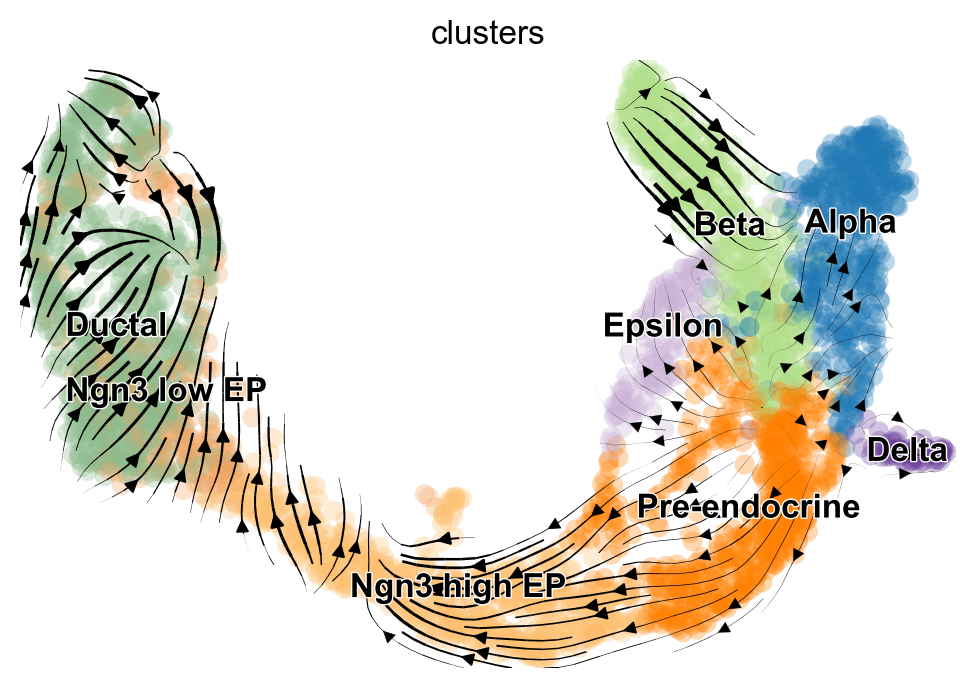

In [11]:
mc.acc_embedding_stream(adata)

In [12]:
print(adata.uns['acc_graph'])

  (0, 204)	0.0012556504
  (0, 363)	0.0017907949
  (0, 668)	0.002507124
  (0, 1040)	0.00036890892
  (0, 1099)	0.003791369
  (0, 1437)	0.0015538832
  (0, 1918)	0.00273192
  (0, 1939)	0.00043247177
  (0, 2244)	0.00030519295
  (0, 2324)	0.00017904452
  (0, 2438)	0.0018961196
  (0, 2477)	0.00083510345
  (0, 2885)	0.002970039
  (0, 3343)	0.00024393573
  (0, 3411)	0.00273156
  (0, 3619)	2.1187336e-05
  (1, 9)	0.2216298
  (1, 82)	0.12767582
  (1, 103)	0.17527676
  (1, 122)	0.047412217
  (1, 141)	0.087312564
  (1, 160)	0.117671505
  (1, 176)	0.16178428
  (1, 229)	0.077527754
  (1, 256)	0.024651332
  :	:
  (3695, 2266)	0.003369263
  (3695, 2474)	0.0023954778
  (3695, 2651)	0.00534654
  (3695, 2734)	0.004421911
  (3695, 2764)	0.0010846454
  (3695, 2868)	0.000113860784
  (3695, 2896)	0.002580427
  (3695, 2912)	0.0044393623
  (3695, 2978)	0.0009284886
  (3695, 2986)	0.004307776
  (3695, 3014)	0.0062607755
  (3695, 3089)	0.00030249343
  (3695, 3093)	0.0010988376
  (3695, 3113)	0.0052643535
  (3695, 

In [13]:
adata.obsm['acc_umap']

array([[ 0.00416704,  0.00045286],
       [ 0.07022822,  0.06866793],
       [ 0.01144781,  0.00604314],
       ...,
       [ 0.08184451,  0.08472796],
       [ 0.00086158,  0.00229526],
       [-0.00335452,  0.01295018]])

In [14]:
mc.acc_embedding(adata, basis = 'umap', arrow_length=3, arrow_size=2, dpi=120)

In [15]:
mc.acc_embedding_grid(adata, basis = 'umap', arrow_length=3, arrow_size=2, dpi=120)

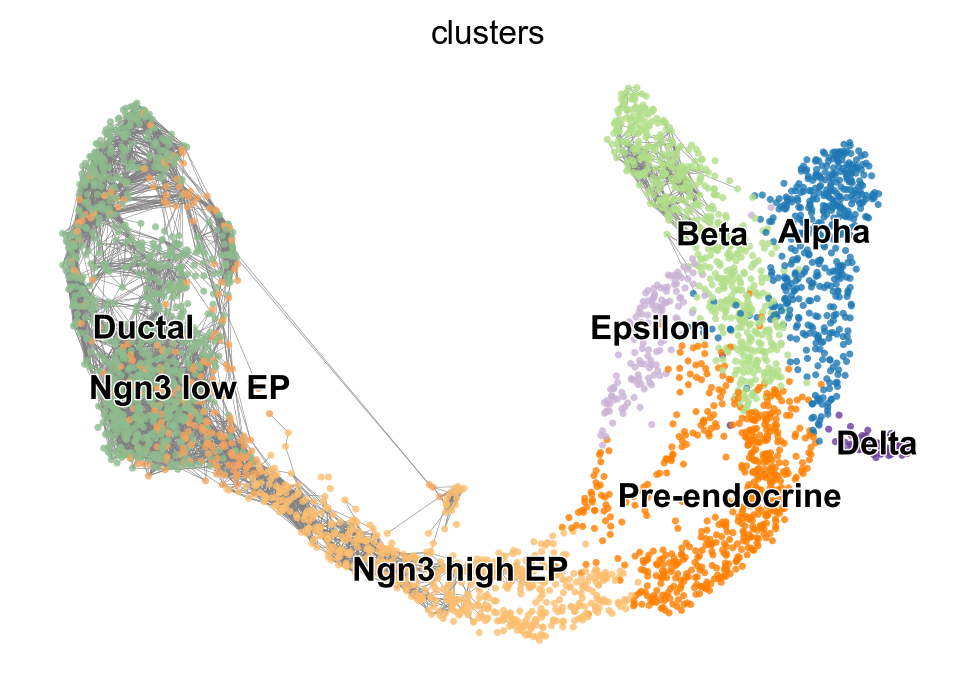

In [16]:
mc.acc_graph(adata)

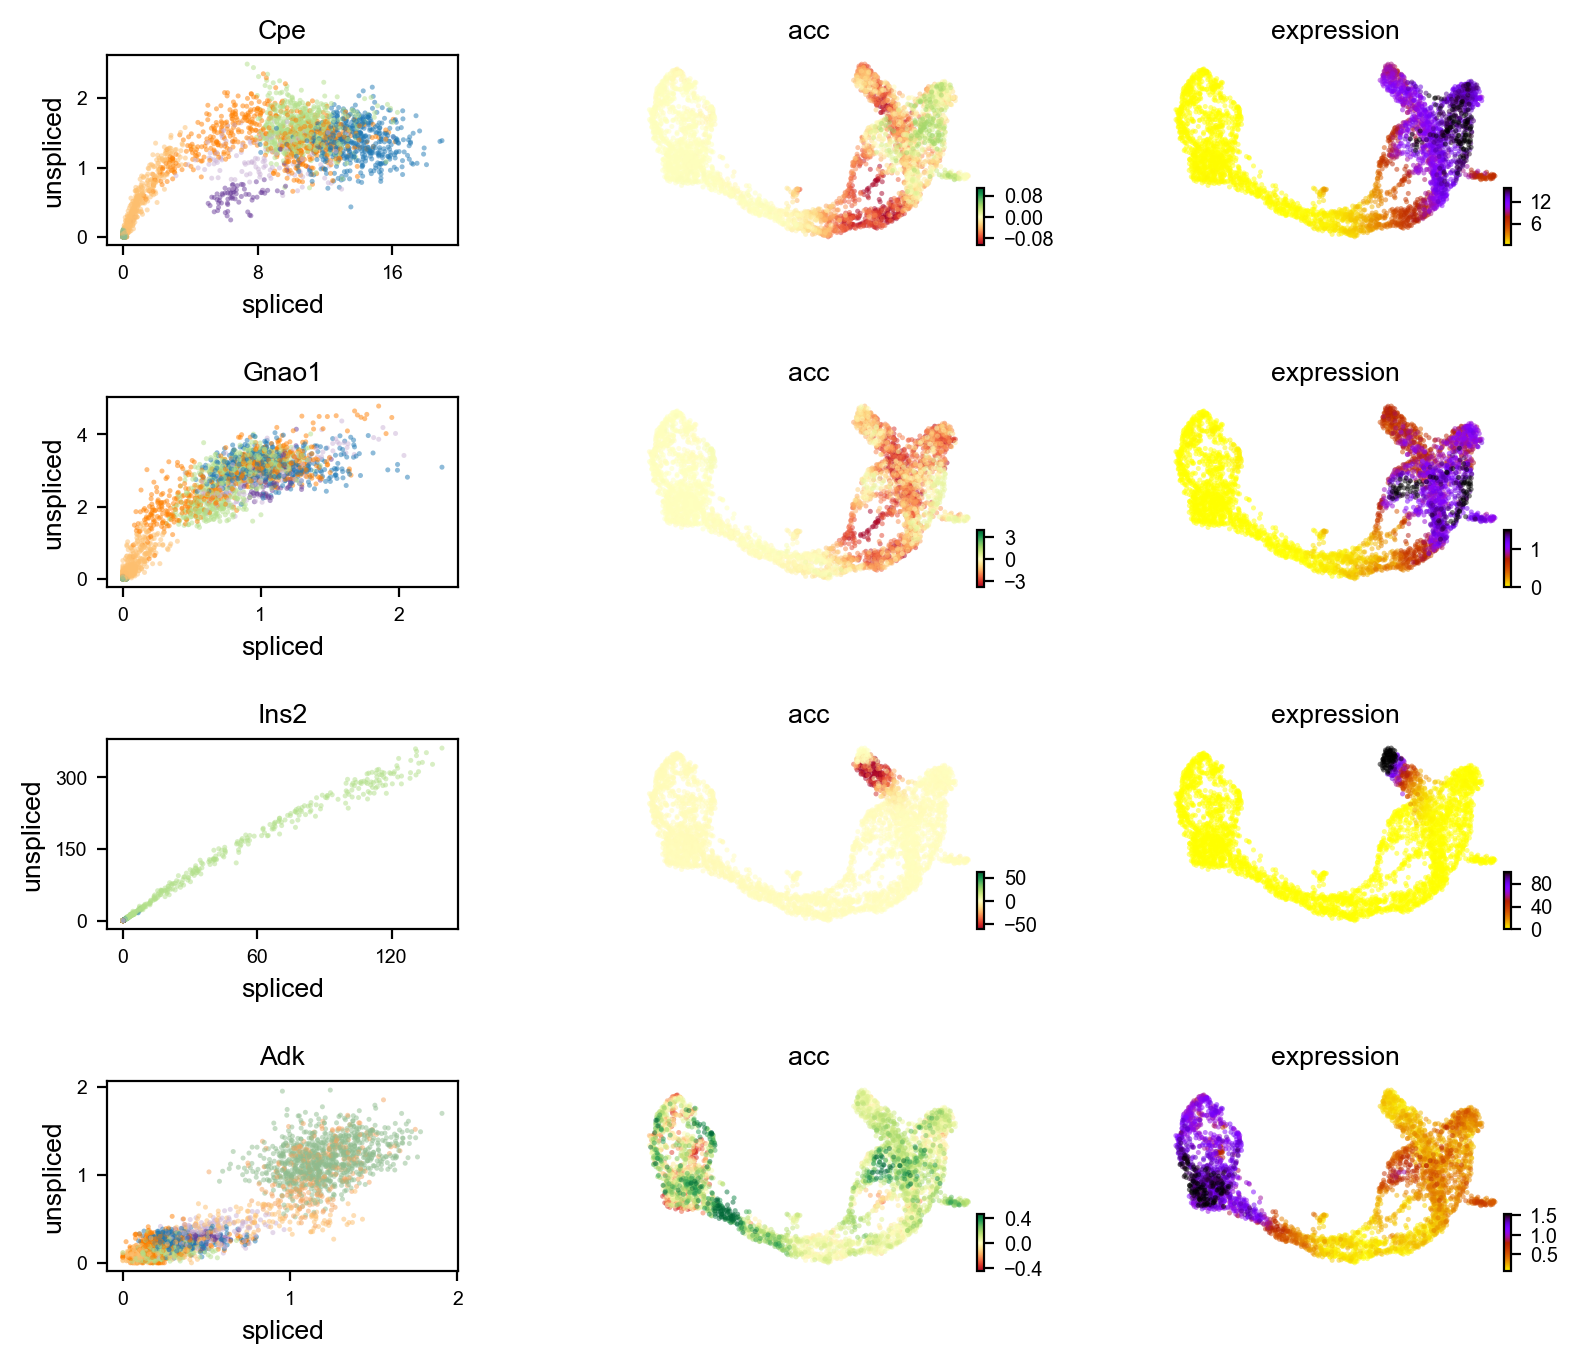

In [17]:
mc.acc(adata, ['Cpe', 'Gnao1', 'Ins2', 'Adk'])

In [18]:
adata.uns['neighbors']['distances'] = adata.obsp['distances']
adata.uns['neighbors']['connectivities'] = adata.obsp['connectivities']

In [19]:
mt.paga(adata, groups='clusters')
df = scv.get_df(adata, 'paga/transitions_confidence', precision=2).T
df.style.background_gradient(cmap='Blues').format('{:.2g}')

computing terminal states
    identified 2 regions of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
running PAGA using priors: ['acc_pseudotime']
    finished (0:00:01) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', acc transitions (adata.uns)


C:\Users\Pradip\AppData\Roaming\Python\Python310\site-packages\networkx\convert.py:158: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `from_scipy_sparse_array` instead.
  return nx.from_scipy_sparse_matrix(data, create_using=create_using)


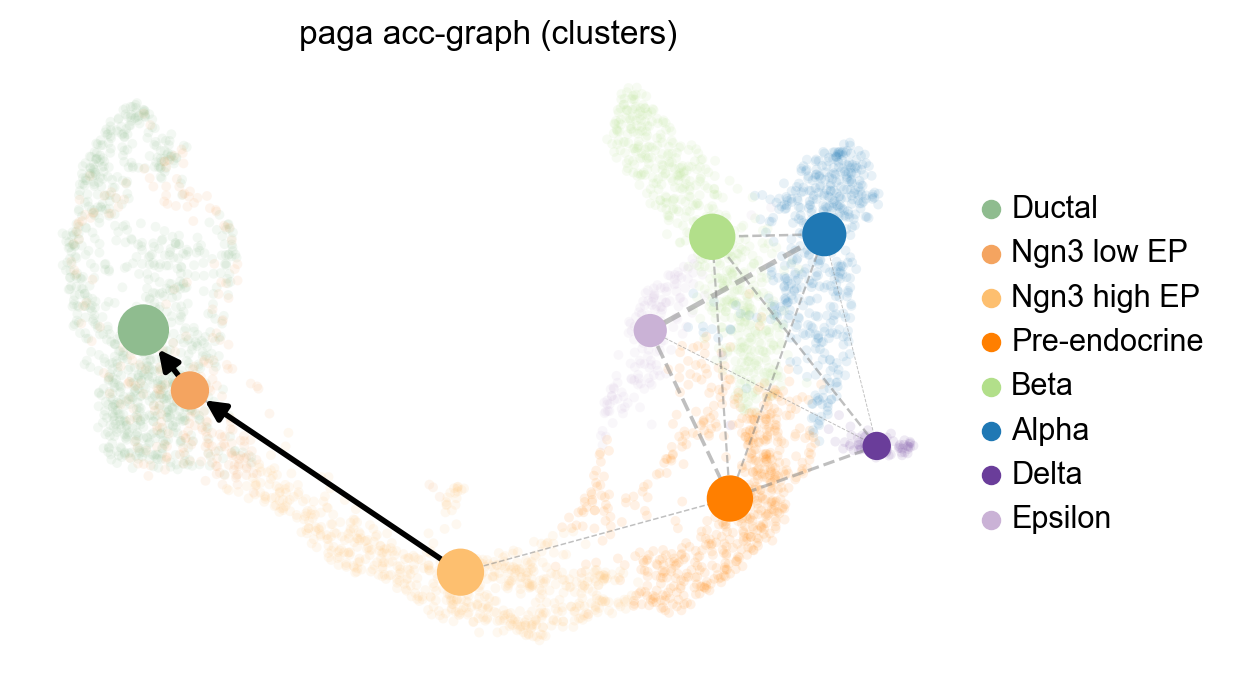

In [20]:
mc.paga(adata, basis='umap', size=50, alpha=.1,
            min_edge_width=2, node_size_scale=1.5)

--> added 'acc_length' (adata.obs)
--> added 'acc_confidence' (adata.obs)
--> added 'acc_confidence_transition' (adata.obs)


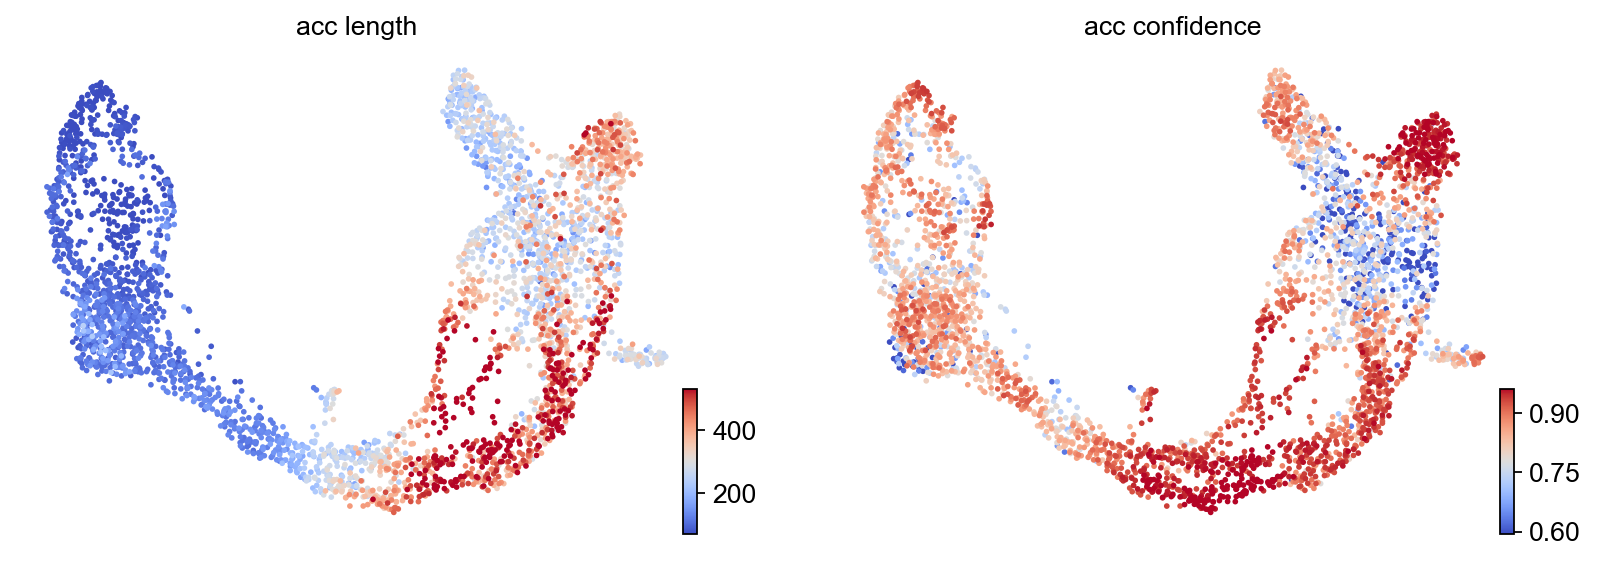

In [21]:
mt.acc_confidence(adata)
keys = 'acc_length', 'acc_confidence'
mc.scatter(adata, c=keys, cmap='coolwarm', perc=[5, 95])

In [22]:
adata.layers.keys()

KeysView(Layers with keys: spliced, unspliced, Ms, Mu, velocity, variance_velocity, acc)

In [19]:
adata

AnnData object with n_obs × n_vars = 3696 × 1945
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'acc_self_transition', 'root_cells', 'end_points', 'acc_pseudotime', 'acc_length', 'acc_confidence', 'acc_confidence_transition'
    var: 'highly_variable_genes', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca', 'velocity_params', 'acc_graph', 'acc_graph_neg', 'acc_params', 'paga', 'clusters_sizes'
    obsm: 'X_pca', 'X_umap', 'acc_umap'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'velocity', 'variance_velocity', 'acc'
    obsp: 'distances', 'connectivities'

In [20]:
adata.uns['acc_graph']

<3696x3696 sparse matrix of type '<class 'numpy.float32'>'
	with 245283 stored elements in Compressed Sparse Row format>

In [16]:
V = adata.obsm['acc_umap']

In [17]:
X = adata.obsm['X_umap']

In [21]:
V

array([[ 0.00416704,  0.00045286],
       [ 0.07022822,  0.06866793],
       [ 0.01144781,  0.00604314],
       ...,
       [ 0.08184451,  0.08472796],
       [ 0.00086158,  0.00229526],
       [-0.00335452,  0.01295018]])